# My Project

## Import necessary libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [2]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values


Solving environment: done

# All requested packages already installed.



In [3]:
#!conda install -c conda-forge folium=0.5.0 --yes
#import folium # plotting library

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## set details for Foursquare API connection

In [23]:
# The code was removed by Watson Studio for sharing.

## Get relevant part of JSON and transform it into a pandas dataframe

In [7]:
global dataframe
dataframe = pd.DataFrame()

In [8]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

#send api call through function 
def get_data(qry):
    #within 1.5km
    radius = 1500
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, qry, radius, LIMIT)
    print('ll={},{}&v={}&query={}&radius={}&limit={}'.format(latitude, longitude, VERSION, qry, radius, LIMIT))
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    td = json_normalize(venues)
    td['rgroup'] = qry
    return td


# Loop through restaurants

In [9]:
query = ["italian","thai","steak","sandwhich","sushi","french","mexican"]
#query = ['italian']

#address = 'First Canadian Place, 100 King St W, Toronto, ON M5X 1A9, Canada'
latitude = 43.649039
longitude = -79.381466

#clear dataframe
dataframe.drop(dataframe.index, inplace=True)

for x in query:
    tmpframe = get_data(x)
    #print(tmpframe)
    dataframe = dataframe.append(tmpframe,ignore_index=True)

dataframe.head()

#dataframe_filtered

ll=43.649039,-79.381466&v=20180604&query=italian&radius=1500&limit=30
ll=43.649039,-79.381466&v=20180604&query=thai&radius=1500&limit=30
ll=43.649039,-79.381466&v=20180604&query=steak&radius=1500&limit=30
ll=43.649039,-79.381466&v=20180604&query=sandwhich&radius=1500&limit=30


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


ll=43.649039,-79.381466&v=20180604&query=sushi&radius=1500&limit=30
ll=43.649039,-79.381466&v=20180604&query=french&radius=1500&limit=30
ll=43.649039,-79.381466&v=20180604&query=mexican&radius=1500&limit=30


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,rgroup,venuePage.id
0,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,5b897e92db1d81002c91df8c,66 Wellington St W,CA,Toronto,Canada,NaN,209,"[66 Wellington St W, Toronto ON M5K 1E7, Canada]","[{'label': 'display', 'lat': 43.647161, 'lng':...",43.647161,-79.381691,NaN,M5K 1E7,ON,Fabbrica Rustic Italian,v-1581167848,italian,NaN
1,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,52f6816f11d24a43115dc834,"382 Yonge Street, Unit #7",CA,Toronto,Canada,Gerrard,1105,"[382 Yonge Street, Unit #7 (Gerrard), Toronto ...","[{'label': 'display', 'lat': 43.65892029202872...",43.658920,-79.382891,NaN,M5B 1S8,ON,Scaddabush Italian Kitchen & Bar,v-1581167848,italian,NaN
2,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,581cad6a7c74e15859a6f890,200 Front St W,CA,Toronto,Canada,at Simcoe St,572,"[200 Front St W (at Simcoe St), Toronto ON M5V...","[{'label': 'display', 'lat': 43.6447367776608,...",43.644737,-79.385355,NaN,M5V 3J1,ON,Scaddabush Italian Kitchen & Bar,v-1581167848,italian,NaN
3,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",False,4c787c9181bca0936180fa14,CNE Midway,CA,Toronto,Canada,NaN,346,"[CNE Midway, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.652144, 'lng':...",43.652144,-79.381118,NaN,NaN,ON,Classic italian style pizza food truck,v-1581167848,italian,NaN
4,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,4f88cf84e4b002b90ab3b9b9,NaN,CA,NaN,Canada,NaN,302,[Canada],"[{'label': 'display', 'lat': 43.65053979517576...",43.650540,-79.384603,NaN,NaN,NaN,LA's Italian + Bar,v-1581167848,italian,NaN


In [10]:
dataframe.count()

categories                   133
hasPerk                      133
id                           133
location.address             116
location.cc                  133
location.city                122
location.country             133
location.crossStreet          67
location.distance            133
location.formattedAddress    133
location.labeledLatLngs      133
location.lat                 133
location.lng                 133
location.neighborhood          5
location.postalCode           88
location.state               122
name                         133
referralId                   133
rgroup                       133
venuePage.id                   5
dtype: int64

## Clean results and keep only filtered data

In [11]:
#clean results
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories', 'rgroup'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.head()

,name,categories,rgroup,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Fabbrica Rustic Italian,Italian Restaurant,italian,66 Wellington St W,CA,Toronto,Canada,NaN,209,"[66 Wellington St W, Toronto ON M5K 1E7, Canada]","[{'label': 'display', 'lat': 43.647161, 'lng':...",43.647161,-79.381691,NaN,M5K 1E7,ON,5b897e92db1d81002c91df8c
1,Scaddabush Italian Kitchen & Bar,Italian Restaurant,italian,"382 Yonge Street, Unit #7",CA,Toronto,Canada,Gerrard,1105,"[382 Yonge Street, Unit #7 (Gerrard), Toronto ...","[{'label': 'display', 'lat': 43.65892029202872...",43.658920,-79.382891,NaN,M5B 1S8,ON,52f6816f11d24a43115dc834
2,Scaddabush Italian Kitchen & Bar,Italian Restaurant,italian,200 Front St W,CA,Toronto,Canada,at Simcoe St,572,"[200 Front St W (at Simcoe St), Toronto ON M5V...","[{'label': 'display', 'lat': 43.6447367776608,...",43.644737,-79.385355,NaN,M5V 3J1,ON,581cad6a7c74e15859a6f890
3,Classic italian style pizza food truck,Food Truck,italian,CNE Midway,CA,Toronto,Canada,NaN,346,"[CNE Midway, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.652144, 'lng':...",43.652144,-79.381118,NaN,NaN,ON,4c787c9181bca0936180fa14
4,LA's Italian + Bar,Italian Restaurant,italian,NaN,CA,NaN,Canada,NaN,302,[Canada],"[{'label': 'display', 'lat': 43.65053979517576...",43.650540,-79.384603,NaN,NaN,NaN,4f88cf84e4b002b90ab3b9b9


In [12]:
#Clean Data and remove unnecessary headings
dfrest = dataframe_filtered[dataframe_filtered.categories != 'Embassy / Consulate']
dfrest = dfrest[dfrest.categories != 'Residential Building (Apartment / Condo)']
dfrest = dfrest[dfrest.categories != 'Neighborhood']
dfrest = dfrest[dfrest.categories != 'Gym / Fitness Center']
dfrest = dfrest[dfrest.categories != 'Clothing Store']
dfrest = dfrest[dfrest.categories != 'Government Building']

dfrest['rgroup'].value_counts()


sushi        30
thai         29
steak        24
mexican      18
italian      15
french        4
sandwhich     2
Name: rgroup, dtype: int64

## Create bar chart showing restaurants per group

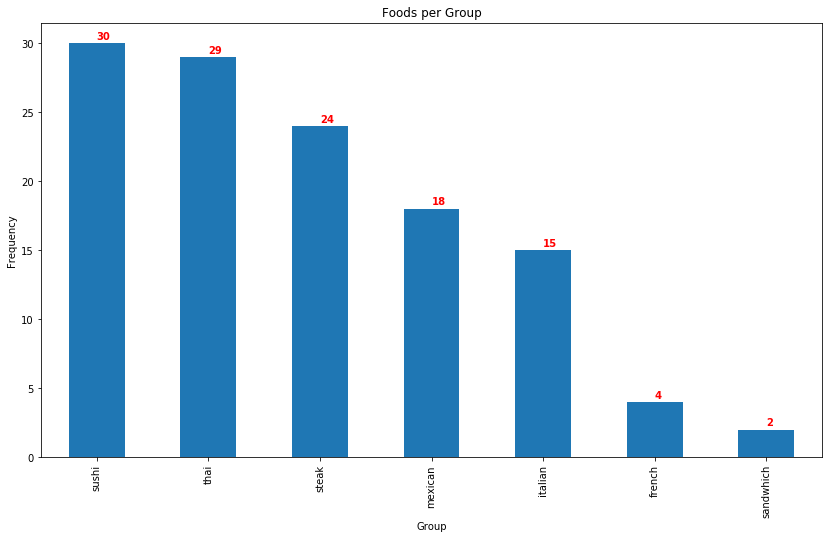

In [13]:
ax = dfrest['rgroup'].value_counts().plot(kind='bar',figsize=(14,8),title="Foods per Group")
ax.set_xlabel("Group")
ax.set_ylabel("Frequency")

y = dfrest['rgroup'].value_counts()
for i, v in enumerate(y):
    ax.text(i, v+0.3, str(v), color='red', fontweight='bold')

plt.show()

In [14]:
# The code was removed by Watson Studio for sharing.

,num,id,rgroup,distance,postalCode,avgprice
0,0,4c2dff26e307d13aeab50eda,french,281,NaN,45
1,1,59add6d3c824ae7692f4a8e9,french,940,M5V 2G3,40
2,2,4b9a9949f964a52013c535e3,french,1072,M5T 1G5,32
3,3,4c45ef79f88dc928a944ae75,french,789,NaN,28
4,4,4c787c9181bca0936180fa14,italian,346,NaN,37


## left join average price to main dataframe
## Delete unnecessary columns

In [15]:
dB = df_data_csv[['id','avgprice']]
df = pd.merge(dfrest, dB, on='id')

del df['address']
del df['cc']
del df['city']
del df['crossStreet']
del df['formattedAddress']
del df['labeledLatLngs']
del df['country']
del df['state']
del df['categories']

df.head()

,name,rgroup,distance,lat,lng,neighborhood,postalCode,id,avgprice
0,Fabbrica Rustic Italian,italian,209,43.647161,-79.381691,NaN,M5K 1E7,5b897e92db1d81002c91df8c,31
1,Scaddabush Italian Kitchen & Bar,italian,1105,43.658920,-79.382891,NaN,M5B 1S8,52f6816f11d24a43115dc834,44
2,Scaddabush Italian Kitchen & Bar,italian,572,43.644737,-79.385355,NaN,M5V 3J1,581cad6a7c74e15859a6f890,22
3,Classic italian style pizza food truck,italian,346,43.652144,-79.381118,NaN,NaN,4c787c9181bca0936180fa14,37
4,LA's Italian + Bar,italian,302,43.650540,-79.384603,NaN,NaN,4f88cf84e4b002b90ab3b9b9,35


## Convert data from categorical to numerical so 
## it can be plotted and analyzed in 3d KMeans analysis

In [16]:
df.rgroup = pd.Categorical(df.rgroup)
df['rgroupnum'] = df.rgroup.cat.codes

## Save restaurant type, distance from building and average price to new dataframe
## Predict with KMeans on these attributes

In [17]:
X = df[['rgroupnum','distance','avgprice']]
X.head(10)

,rgroupnum,distance,avgprice
0,1,209,31
1,1,1105,44
2,1,572,22
3,1,346,37
4,1,302,35
5,1,749,35
6,1,804,11
7,1,841,19
8,1,924,24
9,1,1237,33


In [18]:
k_means = KMeans(n_clusters=7)
y = k_means.fit_predict(X[['rgroupnum', 'distance', 'avgprice']])
df['Cluster'] = y
#labels = k_means.predict(X)
#labels

## in scatter plot show restaurant types with walking distance
## shows how the kmeans clustered the data together.

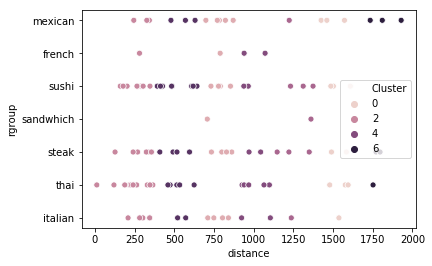

In [19]:
sns.scatterplot(x="distance", y="rgroup", hue=df['Cluster'], data=df)

## Find average price per Cluster

In [20]:
df[['Cluster','avgprice']].groupby(['Cluster'], as_index=False).mean()

,Cluster,avgprice
0,0,34.166667
1,1,28.350000
2,2,36.694444
3,3,33.666667
4,4,29.307692
5,5,36.833333
6,6,36.000000


## show prediction for "sandwhich" group

In [21]:
df[df.rgroup == 'sandwhich']

,name,rgroup,distance,lat,lng,neighborhood,postalCode,id,avgprice,rgroupnum,Cluster
66,Subway,sandwhich,1361,43.661265,-79.381127,NaN,M5B 2H9,4ca8ac1c76d3a0931108186b,11,3,3
67,Subway,sandwhich,708,43.646459,-79.389506,NaN,M5V 1J5,4c7e90a5d51ea1430508589f,26,3,1


#### Conclusion:  sandwhich was clustered in group 1 and 3 through prediction
#### avg price for those are USD 33 and USD 28
#### therefore a new business can be started by selling sandwhiches for ~  USD 30 in this area

### Finally a 3D of KMean Clusters

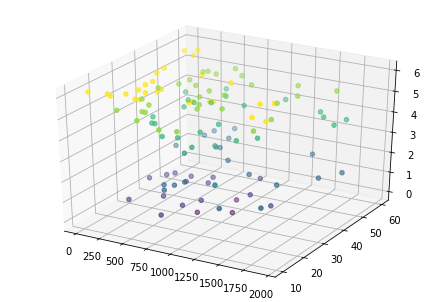

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Creating a sample dataset with 7 clusters
KMX, KMY = make_blobs(n_samples=800, n_features=3, centers=7)

fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(df[:, 'rgroupnum'], df[:, 'distance'], df[:, 'avgprice'])
#ax.scatter(KMX[:, 0], KMX[:, 1], KMX[:, 2])
ax.scatter(df.iloc[:, 2], df.iloc[:, 8], df.iloc[:, 9], c=df.iloc[:, 9])
plt.rcParams['figure.figsize'] = (16, 9)
